In [ ]:
# https://python.plainenglish.io/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 38.5MB 1.9MB/s
     |████████████████████████████████| 10.1MB 9.5MB/s 
     |████████████████████████████████| 645kB 46.6MB/s 
     |████████████████████████████████| 112kB 61.4MB/s 
     |████████████████████████████████| 1.1MB 50.6MB/s 
     |████████████████████████████████| 3.1MB 34.0MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 296kB 68.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=086ae3285557e8fe864f86a35f6c77d8328ff31cf809433fd3d660a994798555
  Stored in directory: /tmp/pip-ephem-wheel-cache-xcic9bu6/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=0ceab3802b0cab764d40dbafdcba1929820df5da500b18ed2f096ac956cc57c1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f9406

In [ ]:
# 左上のフォルダマークから「ドライブをマウント」をクリックするだけでマウント完了する（下のコードは不要）

# from google.colab import drive
# drive.mount('/content/drive')

# また、Google Drive上から直接Colabratoryファイルを新規作成すれば、初めに一度マウントすると以降は自動的にマウントされる

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

# Pandas以外に下記の方法でCSVを読み込む方法もある

# import csv

# csvfile = open('/content/sample_data/california_housing_train.csv')
# reader = csv.DictReader(csvfile)

# for row in reader:
#  print(row)

longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]

In [ ]:
# Pandas Profilingを使用してデータの全体像を把握する
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# HTMLファイルとして保存し、Webページで公開することも可能
# profile.to_file(output_file"Profile_Report.html")

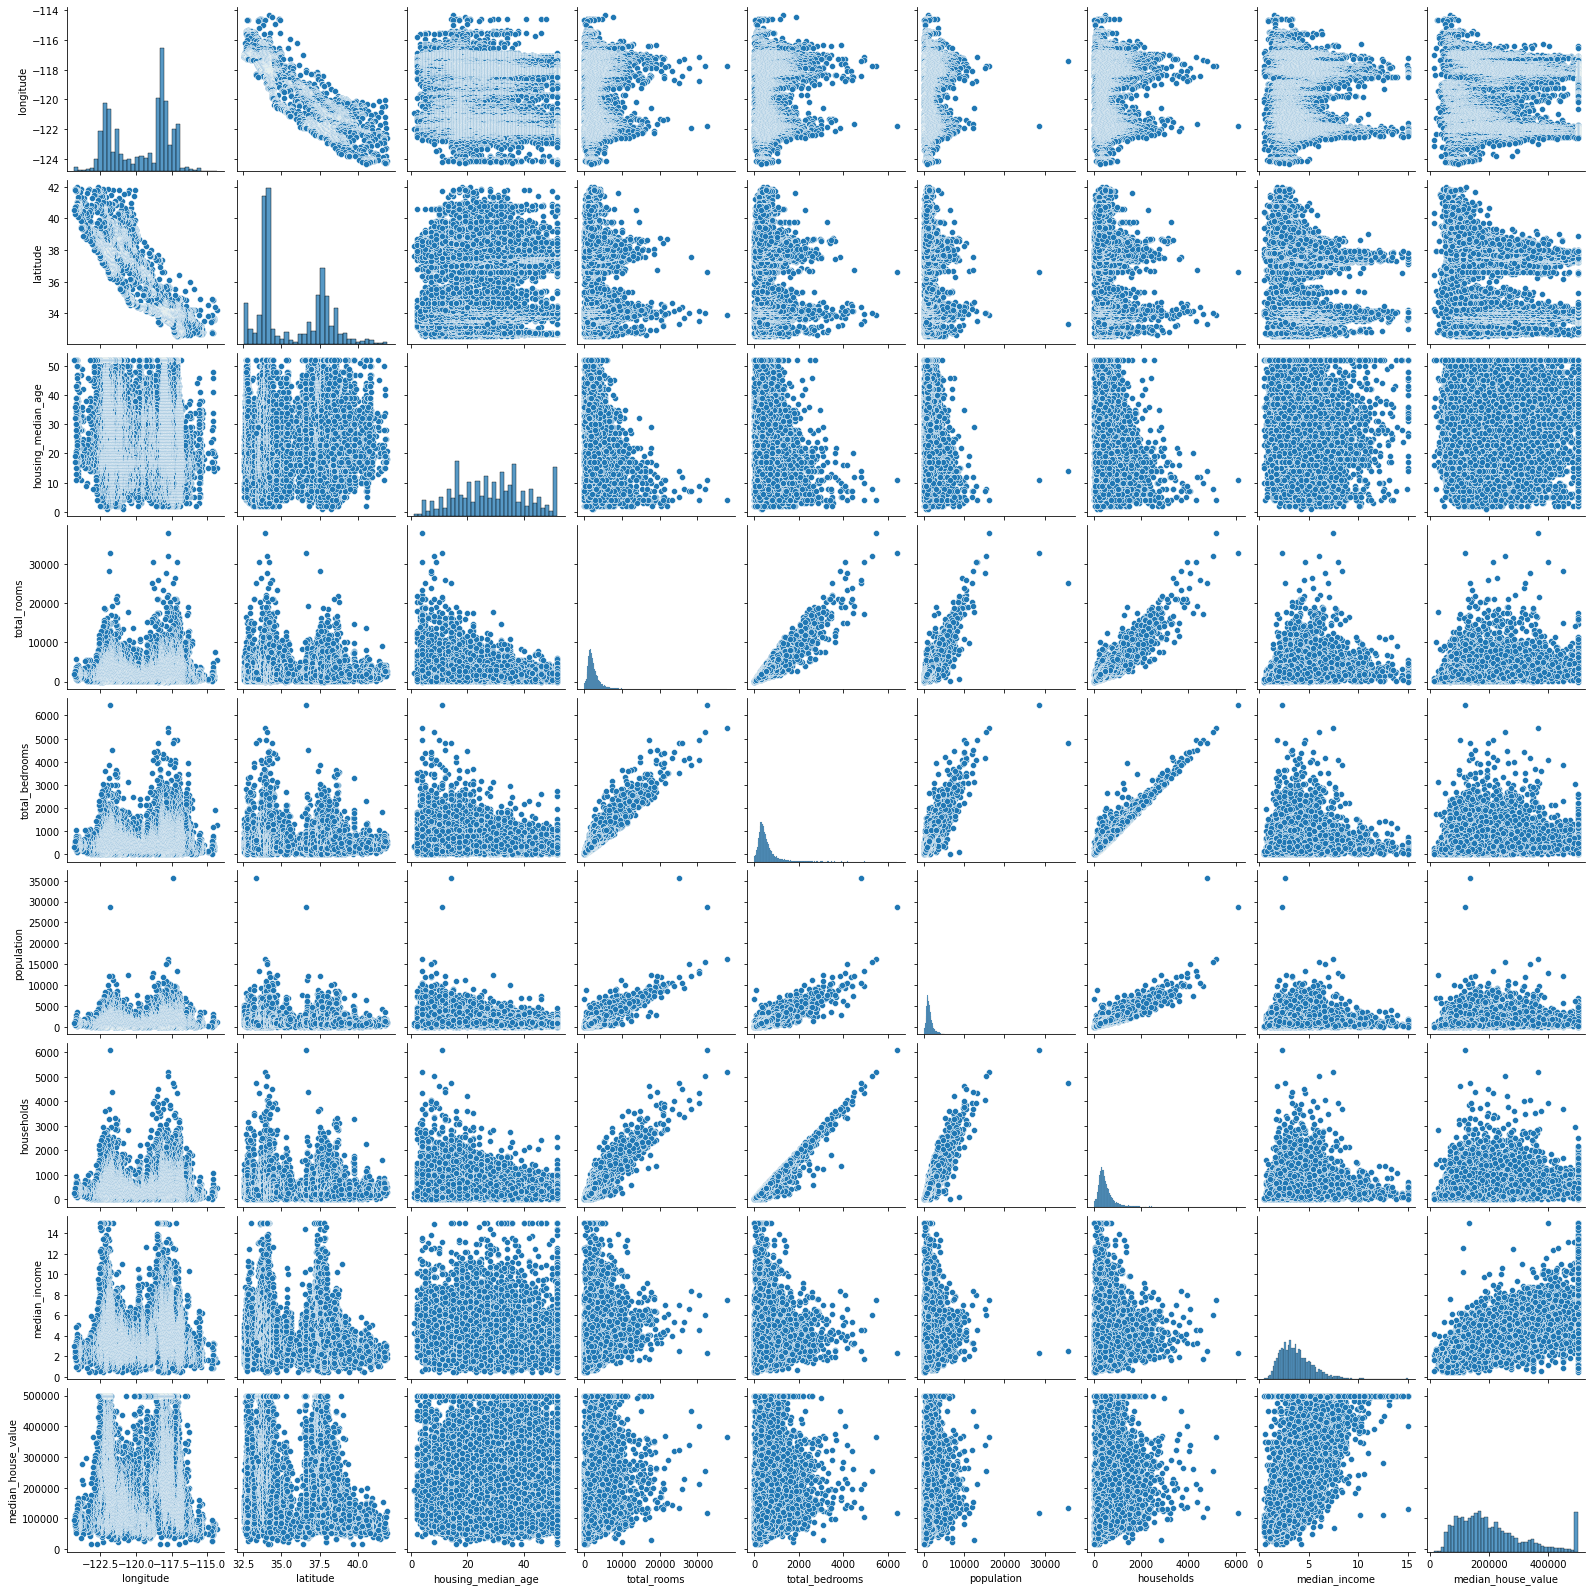

In [ ]:
# Seabornを使用して全項目の散布図を表示する
sns.pairplot(df)

In [ ]:
# 相関係数と決定係数を表示する。決定係数は相関係数の2乗
corr_income = df.corr().loc['median_income', 'median_house_value']
print("収入と価格の相関係数: ", corr_income)
print("収入と価格の決定係数: ", corr_income**2)

# 全相関係数を表示する
df.corr()

収入と価格の相関係数:  0.6918706037806734
収入と価格の決定係数:  0.4786849323758336


longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.925208  ...      -0.015485           -0.044982
latitude            -0.925208  1.000000  ...      -0.080303           -0.144917
housing_median_age  -0.114250  0.016454  ...      -0.115932            0.106758
total_rooms          0.047010 -0.038773  ...       0.195383            0.130991
total_bedrooms       0.071802 -0.069373  ...      -0.013495            0.045783
population           0.101674 -0.111261  ...      -0.000638           -0.027850
households           0.059628 -0.074902  ...       0.007644            0.061031
median_income       -0.015485 -0.080303  ...       1.000000            0.691871
median_house_value  -0.044982 -0.144917  ...       0.691871            1.000000

[9 rows x 9 columns]

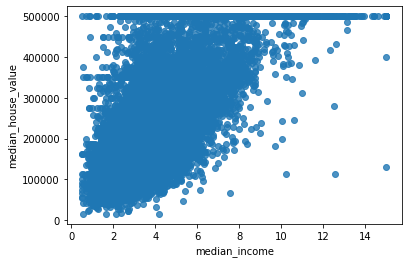

In [ ]:
# Seabornで'median_income'と'median_house_value'の散布図を表示する
sns.regplot(x = df['median_income'], y = df['median_house_value'], fit_reg=False)

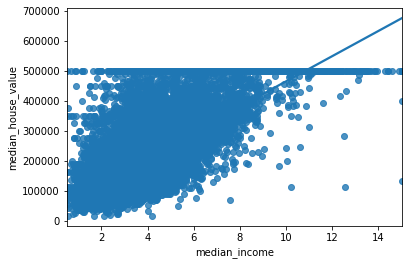

In [ ]:
# Seabornで'median_income'と'median_house_value'の単回帰分析を表示する
sns.regplot(x = df['median_income'], y = df['median_house_value'], fit_reg=True, ci=None)